In [26]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline

In [67]:
res = pickle.load(open('results/quantitative/unc_error_corr.p', 'rb'))

In [68]:
res.keys()

dict_keys(['intervals', 'mean_unc_mc', 'mean_unc_our'])

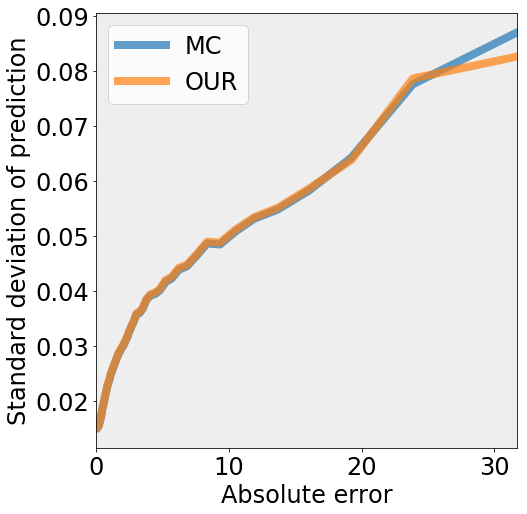

In [71]:
alpha=0.7

plt.rcParams["figure.figsize"] = [8,8]
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 
fig, ax1 = plt.subplots()
plt.gcf().subplots_adjust(left=0.17)
ax1.set_facecolor('#eeeeee')
ax1.set_ylabel('Standard deviation of prediction', fontsize=24)
ax1.set_xlabel('Absolute error', fontsize=24)
ax1.plot(res['intervals'], np.sqrt(res['mean_unc_mc']), label='MC', alpha=alpha, linewidth=8.0)
ax1.plot(res['intervals'], np.sqrt(res['mean_unc_our']), label='OUR', alpha=alpha, linewidth=8.0)
ax1.set_xlim([0, res['intervals'].max()])
fig.savefig('results/quantitative/err_unc_cor_monodepth.png')
plt.legend(fontsize=24)
plt.show()

In [40]:
res = pickle.load(open('results/quantitative/rts&abs_diffs.p', 'rb'))
res.keys()

dict_keys(['mean_rt_mc', 'mean_abs_diff_vars', 'mean_rt_our', 'samples'])

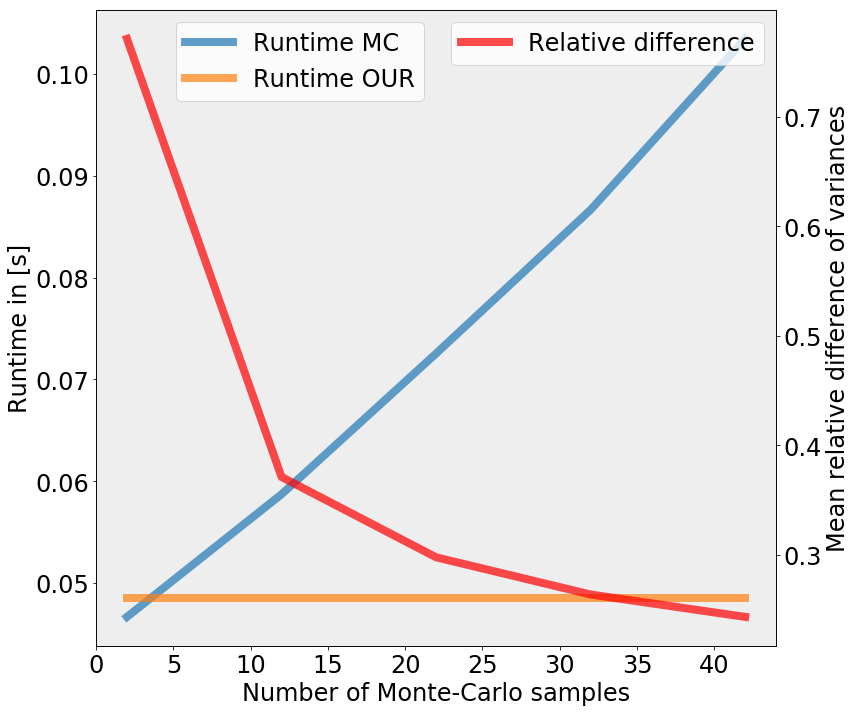

In [65]:
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 

plt.rcParams["figure.figsize"] = [12,10]
fig, ax1 = plt.subplots()
ax1.set_facecolor('#eeeeee')

ax1.set_xlabel('Number of Monte-Carlo samples', fontsize=24)
ax1.set_ylabel('Runtime in [s]', fontsize=24)
ax1.plot(res['samples'][:5], res['mean_rt_mc'][:5], label='Runtime MC', alpha=alpha, linewidth=8.0)
ax1.plot(res['samples'][:5], np.ones(len(res['mean_rt_our']))[:5]*np.mean(res['mean_rt_our']), label='Runtime OUR', alpha=alpha, linewidth=8.0)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Mean relative difference of variances', fontsize=24)  # we already handled the x-label with ax1
ax2.plot(res['samples'][:5], np.array(res['mean_abs_diff_vars'][:5])/1.9499976e-06, label='Relative difference', c='r', alpha=alpha, linewidth=8.0)
ax2.tick_params(axis='y')

ax1.legend(fontsize=24, bbox_to_anchor=(0.1, 0., 0.4, 1.0))
ax2.legend(fontsize=24)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('results/quantitative/rts&abs_diffs.png')

plt.show()